# 🧮 수치미분

### 📥 Import

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Thanks to **dhaitz**!
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

# 한글폰트 설정
import matplotlib as mpl
mpl.rc('font', family='D2Coding')
mpl.rcParams['axes.unicode_minus'] = False

### 🎚️ 일변수 미분

#### 🔍 수치미분 함수

In [24]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x + h) - f(x - h)) / (2 * h)

#### 📏 접선 함수

In [25]:
def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(f'접선의 기울기: {d:.6f}')
    y = f(x) - d * x
    return lambda t: d * t + y

#### 🔬 임의의 함수에 대한 테스트

접선의 기울기: 0.200000


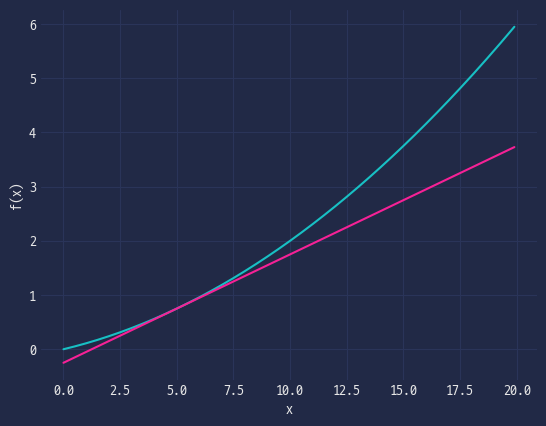

In [23]:
def function_1(x):
    return 0.01 * x**2 + 0.1 * x


x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

### 🎛️ 다변수 미분(편미분)

#### 🔍 수치미분 함수

In [32]:
def _numerical_gradient_without_batch(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for i in range(x.size):
        tmp = x[i]
        
        x[i] = float(tmp) + h
        fxh1 = f(x)
        
        x[i] = tmp - h
        fxh2 = f(x)
        
        grad[i] = (fxh1 - fxh2) / (2 * h)
        
        x[i] = tmp

    return grad

def numerical_gradient(f, x):
    if x.ndim == 1:
        return _numerical_gradient_without_batch(f, x)

    grad = np.zeros_like(x)
    for i, x_i in enumerate(x):
        grad[i] = _numerical_gradient_without_batch(f, x_i)

    return grad

#### 📏 접선 함수

In [33]:
def tangent_line(f, x):
    d = numerical_diff(f, x)
    y = f(x) - d * x
    return lambda t: d * t + y

#### 🔬 임의의 함수에 대한 테스트

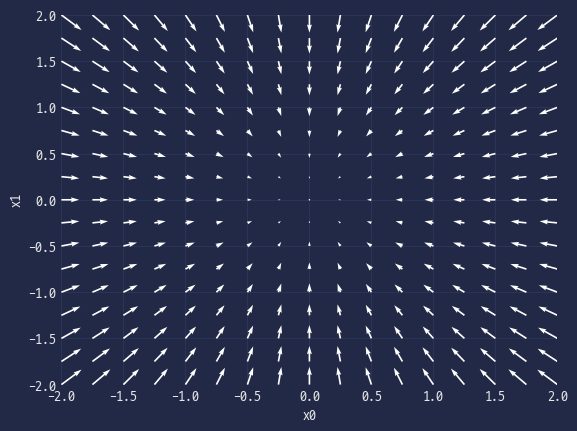

In [44]:
def function_2(x):
    if x.ndim == 1:
        return np.sum(x ** 2)
    return np.sum(x ** 2, axis=1)


x0 = np.arange(-2, 2.5, 0.25)
x1 = np.arange(-2, 2.5, 0.25)
X, Y = np.meshgrid(x0, x1)

X = X.flatten()
Y = Y.flatten()

grad = numerical_gradient(function_2, np.array([X, Y]))

plt.figure()
plt.quiver(X, Y, -grad[0], -grad[1], angles='xy', color='white')
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()